In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#Task 1
data=pd.read_csv('DS.csv')
print(f"Rows:{data.shape[0]}")
print(f"Columns:{data.shape[1]}")

Rows:9551
Columns:21


In [6]:
#null_cuisine_rows count
null_cuisine_rows = data[data['Cuisines'].isnull()]
null_count = null_cuisine_rows.shape[0]
print(f"Number of rows with null 'Cuisines': {null_count}")

Number of rows with null 'Cuisines': 9


In [7]:
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
# 3. Handle missing values in 'Cuisines' by filling with mode (most frequent cuisine)
data.fillna({'Cuisines': data['Cuisines'].mode()[0]}, inplace=True)


In [9]:
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [10]:
# Example: Fill missing numerical values with column mean
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

# Example: Fill missing categorical values with column mode
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])


In [11]:
# Print data types
print(data.dtypes)


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


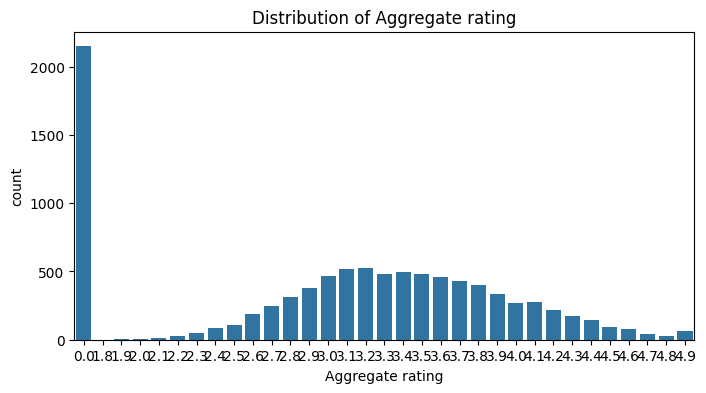

In [12]:
# Value counts
print(data['Aggregate rating'].value_counts())

# Visualize distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Aggregate rating', data=data)
plt.title('Distribution of Aggregate rating')
plt.show()


In [16]:
# 6. Calculate class imbalance percentage
print(data['Aggregate rating'].value_counts(normalize=True)*100)

Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9     0.020940
1.8     0.010470
Name: proportion, dtype: float64


In [17]:
# 7. Explore unique cuisine types (sample first 10 unique cuisines)
print("Sample unique cuisines:")
print(data['Cuisines'].unique()[:10])
print("cusines:",data['Cuisines'].head(15))

Sample unique cuisines:
['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' 'Japanese, Sushi' 'Japanese, Korean'
 'Chinese' 'Asian, European' 'Seafood, Filipino, Asian, European'
 'European, Asian, Indian' 'Filipino']
cusines: 0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
5                                Chinese
6                        Asian, European
7     Seafood, Filipino, Asian, European
8                European, Asian, Indian
9                               Filipino
10                     Filipino, Mexican
11         American, Ice Cream, Desserts
12                     Filipino, Mexican
13                              Filipino
14                                Korean
Name: Cuisines, dtype: object


In [21]:
#Task-2
print(data.describe())

# Calculate median values for all numerical columns
print("Medians:\n", data.median(numeric_only=True))


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [30]:
# Frequency count for Country Code
print("Country Code counts:\n", data['Country Code'].value_counts())

# Frequency count for City
print("City counts:\n", data['City'].value_counts())

# Frequency count for Cuisines (combinations as in the data)
print("Cuisines counts:\n", data['Cuisines'].value_counts().head(20))
#print("for LL THE DEATILS OVER THE CUISINES DETAILS IN REPEAT")
#data['Cuisines'].str.split(', ').explode().value_counts().head(250)


Country Code counts:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
City counts:
 City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
Cuisines counts:
 Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food   

In [34]:
from collections import Counter

In [35]:
# Top 10 Cities
print("Top Cities:\n", data['City'].value_counts().head(10))

# Top 10 Cuisines (as combos, not individual)
print("Top Cuisines (combos):\n", data['Cuisines'].value_counts().head(10))

# To find the most popular stand-alone cuisines:
all_cuisines = data['Cuisines'].dropna().str.split(',').sum()
all_cuisines = [c.strip() for c in all_cuisines]
cuisine_counts = Counter(all_cuisines)
print("Top 10 individual cuisines:\n", cuisine_counts.most_common(10))


Top Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64
Top Cuisines (combos):
 Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
Top 10 individual cuisines:
 [('North Indian', 3969), ('Chinese', 2735), ('Fast Food', 1986), ('Mughlai', 995), ('Italian', 764), ('Bakery', 745), ('Continental', 736), ('Cafe', 703), ('Desserts', 653), ('South Indian', 636)]


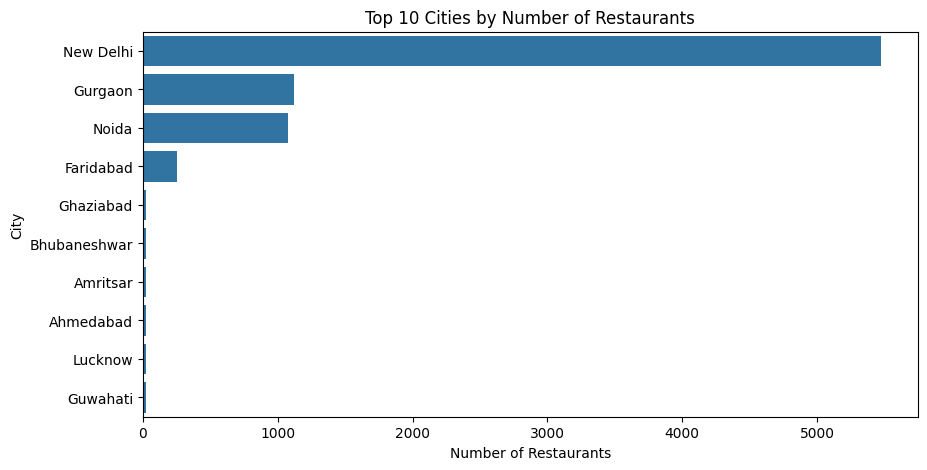

In [40]:
# Visualizing the top  cities
plt.figure(figsize=(10, 5))
sns.barplot(x=data['City'].value_counts().head(10).values, y=data['City'].value_counts().head(10).index)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


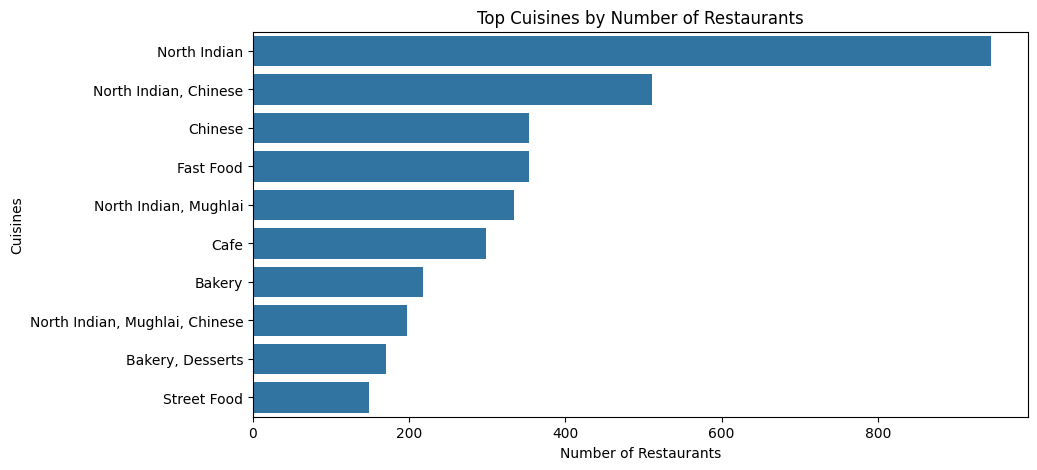

In [42]:
# Visualizing the   cusines
plt.figure(figsize=(10, 5))
sns.barplot(x=data['Cuisines'].value_counts().head(10).values, y=data['Cuisines'].value_counts().head(10).index)
plt.title('Top Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()